In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pickle

plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({"text.usetex": True,
                        "text.latex.preamble": r"\usepackage{amsmath}"})
plt.rcParams.update({'pdf.fonttype': 42})

In [3]:
# load data
folder = "exp2_results"
exp_no_circ = "no_circ_2024-08-06-17-57-56_keep"
file = 'data.pickle'
with open(folder + '/' + exp_no_circ + '/' + file, 'rb') as f:
    data_no_circ = pickle.load(f)

Video duration:  21.945943117141724


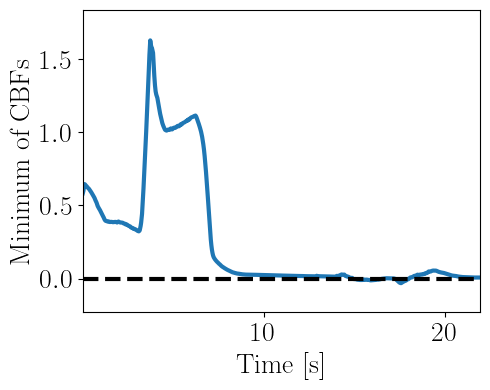

In [4]:
all_h = np.array(data_no_circ['all_h'])
h_min = np.min(all_h, axis=1)
t = np.cumsum(data_no_circ['time_per_loop'])

# Calculate the total duration of the animation in seconds
total_duration = t[-1]

# Calculate the number of frames needed for 30 fps
desired_frame_count = int(total_duration * 30)

# Determine the step size to downsample frames
step_size = max(1, len(t) // desired_frame_count)

# Downsample t and h_min arrays to match 30 fps
t_downsampled = t[::step_size]
h_min_downsampled = h_min[::step_size]

fig, ax = plt.subplots(figsize=(5, 4), frameon=True)
label_fs = 20
tick_fs = 20
legend_fs = 20
linewidth = 3

ax.set_xlim(t_downsampled[0], t_downsampled[-1])
ax.set_ylim(np.min(h_min) - 0.2, np.max(h_min) + 0.2)

line, = ax.plot([], [], linewidth=linewidth)
dash_line = ax.hlines(0, t_downsampled[0], t_downsampled[-1], colors='k', linestyles='dashed', linewidth=linewidth)

ax.set_xlabel('Time [s]', fontsize=label_fs)
ax.set_ylabel('Minimum of CBFs', fontsize=label_fs)
ax.tick_params(axis='both', labelsize=tick_fs)
plt.tight_layout()

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(t_downsampled[:frame + 1], h_min_downsampled[:frame + 1])
    return line,

anim = FuncAnimation(fig, update, frames=len(t_downsampled), init_func=init, blit=True)

print("Video duration: ", total_duration)
# Save the animation as a video with 30 fps
anim.save(folder + '/' + exp_no_circ + '/cbf_no_circ.mp4', writer='ffmpeg', fps=30)



In [5]:
# load data
folder = "exp2_results"
exp_with_circ = "with_circ_2024-08-06-18-01-37_keep"
file = 'data.pickle'
with open(folder + '/' + exp_with_circ + '/' + file, 'rb') as f:
    data_with_circ = pickle.load(f)

Video duration:  21.935784578323364


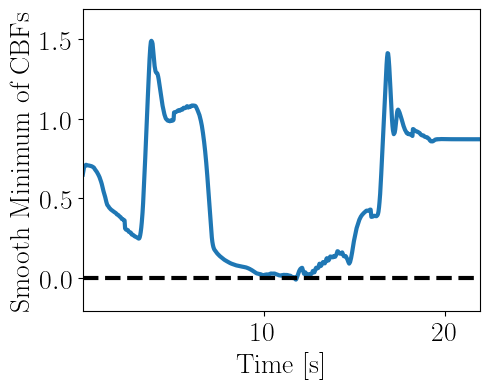

In [6]:
smooth_min = np.array(data_with_circ['smooth_min'])
t = np.cumsum(data_with_circ['time_per_loop'])

# Calculate the total duration of the animation in seconds
total_duration = t[-1]

# Calculate the number of frames needed for 30 fps
desired_frame_count = int(total_duration * 30)

# Determine the step size to downsample frames
step_size = max(1, len(t) // desired_frame_count)

# Downsample t and h_min arrays to match 30 fps
t_downsampled = t[::step_size]
smooth_min_downsampled = smooth_min[::step_size]

fig, ax = plt.subplots(figsize=(5, 4), frameon=True)
label_fs = 20
tick_fs = 20
legend_fs = 20
linewidth = 3

ax.set_xlim(t_downsampled[0], t_downsampled[-1])
ax.set_ylim(np.min(smooth_min) - 0.2, np.max(smooth_min) + 0.2)

line, = ax.plot([], [], linewidth=linewidth)
dash_line = ax.hlines(0, t_downsampled[0], t_downsampled[-1], colors='k', linestyles='dashed', linewidth=linewidth)

ax.set_xlabel('Time [s]', fontsize=label_fs)
ax.set_ylabel('Smooth Minimum of CBFs', fontsize=label_fs)
ax.tick_params(axis='both', labelsize=tick_fs)
plt.tight_layout()

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(t_downsampled[:frame + 1], smooth_min_downsampled[:frame + 1])
    return line,

anim = FuncAnimation(fig, update, frames=len(t_downsampled), init_func=init, blit=True)

print("Video duration: ", total_duration)
# Save the animation as a video with 30 fps
anim.save(folder + '/' + exp_with_circ + '/cbf_with_circ.mp4', writer='ffmpeg', fps=30)